<a href="https://colab.research.google.com/github/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Preparando ambiente para realizar a análise**

---
**Objetivo**


*  Conectar na plataforma Kaggle com o Google Colab.

---
**Passo a passo**

1.   Criar um token para utilzar a API do Kaggle, retornando um aquivo .json e realizar o upload desse arquivo para o colab.

  *   é um arquivo de configuração que contém minhas credênciais de API do Kaggle.
  *   essas credênciais permitem que você se autentique na API do Kaggle e faça downloads de datasets diretamente do Kaggle.

2.   Usa o comando ***'pip install kaggle -q'*** para instalar a biblioteca 'Kaggle', que é uma interface Python para a API do Kaggle.
  *   é o que permite o acesso aos datasets.
  *   o argumento '-q' é abreviação de "quiet", e faz com que o comando pip simplifique a saída de informações durante o processo de instalação.

3. É necessario criar uma pasta que armazene o arquivo kaggle.json para que seja possível realizar o acesso a API. Foi feito:

  *   Criação da pasta.
  *   Movimentação do arquivo .json para a pasta criada.
  *   Atribuir uma permissão para a pasta criada.
  *   Essa pasta não é visivel no painel de arquivos do Colab, mas ainda sim é manipulavel via comandos do sheel.
     * !ls -la ~/.kaggle (listar conteudo do diretório).


4. Agora será feito o dowload do dataset que sera trabalhado nessa análise.


5. Realizando o unzip no dataset encontrado.
  - /content/titanic

1.   Upload do kaggle.json

In [1]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


---

2.   Instalando a biblioteca Kaggle

In [2]:
pip install kaggle -q

---



3.   Criando a pasta

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -la ~/.kaggle

total 16
drwxr-xr-x 2 root root 4096 Jul 31 01:08 .
drwx------ 1 root root 4096 Jul 31 01:08 ..
-rw------- 1 root root   71 Jul 31 01:08 kaggle.json


---


4.   Dowload do dataset

In [4]:
%cd /content/

!kaggle competitions download titanic

/content
  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 27.8MB/s]


---


5.   Realizando unzip

In [5]:
!unzip titanic.zip -d titanic

Archive:  titanic.zip
  inflating: titanic/gender_submission.csv  
  inflating: titanic/test.csv        
  inflating: titanic/train.csv       




---

# **Quem é mais provável sobreviver ao titanic ?**

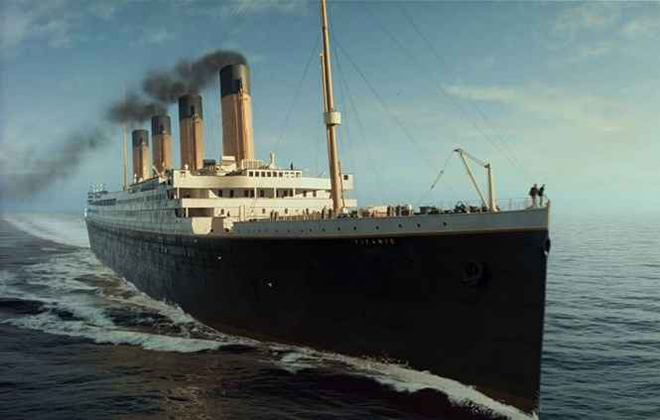

- O objetivo é usar  aprendizado de máquina para criar um modelo que preveja quais passageiros sobreviveram ao naufrágio do Titanic.
- O resultado é avaliado através da **Acurácia**.

- Descrição do dataset
  - **PassengerId**: Id do passageiro
  - **Survived**:  (0) - No,  (1) - Yes
  - **Pclass** (Ticket da classe): 1 = 1st, 2 = 2nd, 3 = 3rd
  - **Name**: Nome
  - **Sex**: Sexo
  - **Age**: Idade
  - **SibSp**: Quantidade de irmãos/cônjuges a bordo
  - **Parch**: Quantidade de pais/filhos a bordo
  - **Ticket**: Número do ticket
  - **Fare**: Tarifa de passageiros
  - **Cabin**: Número da cabine
  - **Embarked**: Porto aonde embarcou ( C = Cherbourg, Q = Queenstown, S = Southampton)
    

# Importando e fazendo o tratamento na base de dados

- Será replicado a mesma coisa feita na [**primeira**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte1.ipynb), [**segunda**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte2.ipynb) e [**terceira**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/724a2795c1408eaa6b2ed6183460b228e7b9e849/analise_titanic_parte3.ipynb) parte dessa análise (para mais detalhes acesse esses links)

In [6]:
# Importando o pandas
import pandas as pd

In [7]:
# Visualizando a base de treino

treino = pd.read_csv('/content/titanic/train.csv')
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Visualizando a base de teste

teste = pd.read_csv('/content/titanic/test.csv')
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- Realizando os mesmos tratamentos iniciais feitos na [**parte 1**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte1.ipynb) e na [**parte 2**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte2.ipynb)

In [9]:
# Eliminando as colunas com elevada cardinalidade

treino = treino.drop(['Name','Ticket','Cabin'],axis=1)

teste = teste.drop(['Name','Ticket','Cabin'],axis=1)

In [10]:
# Usando a média para substituir valores nulos na coluna de idade

treino.loc[treino.Age.isnull(),'Age'] = treino.Age.mean()

teste.loc[teste.Age.isnull(),'Age'] = teste.Age.mean()

In [11]:
# Tratando a coluna Embarked da base de treino usando a moda

treino.loc[treino.Embarked.isnull(),'Embarked'] = treino.Embarked.mode()[0]

# Tratando a coluna Fare da base de teste usando a média

teste.loc[teste.Fare.isnull(),'Fare'] = teste.Fare.mean()

- Realizando a engenharia de variáveis, feito na [**parte 3**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/724a2795c1408eaa6b2ed6183460b228e7b9e849/analise_titanic_parte3.ipynb)

In [12]:
# Usando uma lambda function para fazer esse tratamento (na base de treino e na base de teste)

treino['MaleCheck'] = treino.Sex.apply(lambda x: 1 if x == 'male' else 0)
teste['MaleCheck'] = teste.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [13]:
# Fazendo o RobustScaler das colunas Age e Fare
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(treino[['Age','Fare']])
treino[['Age','Fare']] = transformer.transform(treino[['Age','Fare']])

# e para a base de teste
transformer = RobustScaler().fit(teste[['Age','Fare']])
teste[['Age','Fare']] = transformer.transform(teste[['Age','Fare']])

In [14]:
# Adicionando a coluna sozinho
def sozinho(a,b):
    if (a == 0 and b == 0):
        return 1
    else:
        return 0

treino['Sozinho'] = treino.apply(lambda x: sozinho(x.SibSp,x.Parch),axis=1)
teste['Sozinho'] = teste.apply(lambda x: sozinho(x.SibSp,x.Parch),axis=1)

In [15]:
# Criando a coluna de familiares
treino['Familiares'] = treino.SibSp + treino.Parch
teste['Familiares'] = treino.SibSp + treino.Parch

In [16]:
# Fazendo o OrdinalEncoder para a coluna Embarked
from sklearn.preprocessing import OrdinalEncoder
categorias = ['S','C','Q']

enc = OrdinalEncoder(categories=[categorias],dtype='int32')
enc = enc.fit(treino[['Embarked']])
treino['Embarked'] = enc.transform(treino[['Embarked']])

teste['Embarked'] = enc.transform(teste[['Embarked']])

In [17]:
# Apagando as colunas de texto
treino = treino.drop('Sex',axis=1)
teste = teste.drop('Sex',axis=1)

- Visualizando a base resultante

In [18]:
# Visualizando a base de treino
treino.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Sozinho,Familiares
0,1,0,3,-0.592240,1,0,-0.312011,0,1,0,1
1,2,1,1,0.638529,1,0,2.461242,1,0,0,1
2,3,1,3,-0.284548,0,0,-0.282777,0,0,1,0


### Podemos utilizar outros modelos para fazer a previsão

- Podemos selecionar algoritmos diferentes dos que vimos nas partes anteriores (consulte arquivo da [**parte 1**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte1.ipynb)) considerando os [outros algoritmos disponíveis no scikit-learn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
    - **Regressão Logística**
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
    - **Random Forest**
        - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
    - **MLPClassifier (Redes Neurais)**
        - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
- Antes de usar os algoritmos, precisamos separar a base de treino em **treino e validação**
    - Vamos fazer isso utilizando o **train_test_split**
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [19]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [20]:
# Separando a base de treino em X e y
X = treino.drop(['PassengerId','Survived'],axis=1)

y = treino.Survived

In [21]:
# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

- Para a **Regressão Logística**

In [22]:
# Importando
from sklearn.linear_model import LogisticRegression

In [23]:
# Criando o classificador
clf_rl = LogisticRegression(random_state=42)

In [24]:
# Fazendo o fit com os dados
clf_rl = clf_rl.fit(X_train,y_train)

In [25]:
# Fazendo a previsão
y_pred_rl = clf_rl.predict(X_val)

- Para o **Random Forest**

In [26]:
# Importando
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Criando o classificador
clf_rf = RandomForestClassifier(random_state=42)

In [28]:
# Fazendo o fit com os dados
clf_rf = clf_rf.fit(X_train,y_train)

In [29]:
# Fazendo a previsão
y_pred_rf = clf_rf.predict(X_val)

E para o **MLPClassifier (Redes Neurais)**

In [30]:
# Importando
from sklearn.neural_network import MLPClassifier

In [31]:
# Criando o classificador
clf_mlp = MLPClassifier(random_state=42,max_iter=5000)

In [32]:
# Fazendo o fit com os dados
clf_mlp = clf_mlp.fit(X_train,y_train)

In [33]:
# Fazendo a previsão
y_pred_mlp = clf_mlp.predict(X_val)

# Avaliando os modelos da mesma maneira

Para fazer essa análise, podemos usar:

- **Acurácia** (método de avaliação usado na competição):

  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

- **Matriz de confusão** (ajuda a visualizar a distribuição dos erros):
  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Lembrando que é importante avaliar o modelo em um conjunto de dados que não foi usado para criar o modelo. Isso é importante para evetarmos o que comulmente é chamado de **Overfitting**
- É quando o modelo aprendeu tão bem as relações existentes no treino, que acabou apenas decorando o que deveria ser feito, e ao receber as informações das variáveis preditoras nos dados de teste, o modelo tenta aplicar as mesmas regras decoradas, porém com dados diferentes esta regra não tem validade, e o desempenho é afetado, perdendo assim a capacidade de **Generalização**.



- Avaliando a **acurácia**

In [34]:
# Importando
from sklearn.metrics import accuracy_score

In [35]:

# Para a regressão logística
acuracia_rl = accuracy_score(y_val, y_pred_rl)
print(f'Acúracia Regressão Logística: {acuracia_rl * 100:.3f}%')

# Para a random forest
acuracia_rf = accuracy_score(y_val, y_pred_rf)
print(f'Acúracia Random Forest: {acuracia_rf * 100:.3f}%')

# Para o MLP
acuracia_mlp = accuracy_score(y_val, y_pred_mlp)
print(f'Acúracia MLP: {acuracia_mlp * 100:.3f}%')



Acúracia Regressão Logística: 80.678%
Acúracia Random Forest: 78.983%
Acúracia MLP: 83.051%


- Avaliando a **Matriz de Confusão**

In [36]:
# Importando
from sklearn.metrics import confusion_matrix

In [37]:
# Para a regressão logística
matriz_confusao_rl = confusion_matrix(y_val, y_pred_rl)

# Para a random forest
matriz_confusao_rf = confusion_matrix(y_val, y_pred_rf)

# Para o MLP
matriz_confusao_mlp = confusion_matrix(y_val, y_pred_mlp)

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Função para o plot

def plot_confusion_matrix(matriz, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.title(title, fontsize=18)
    plt.xlabel('Previsto', fontsize=16)
    plt.ylabel('Real', fontsize=16)
    plt.show()

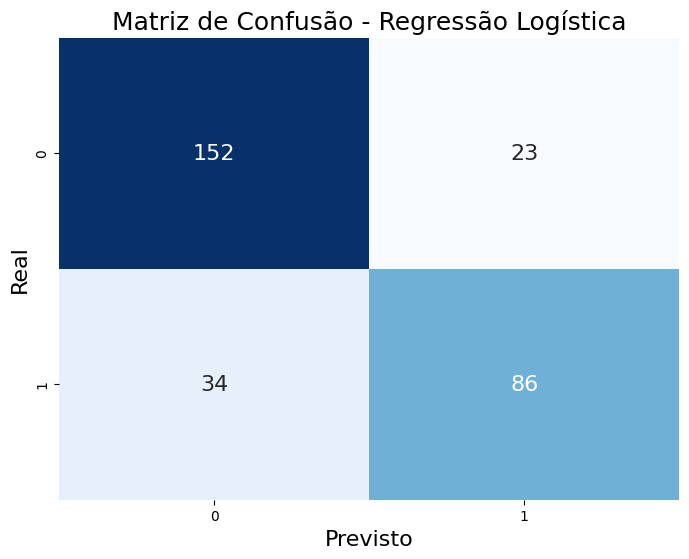

In [39]:
# Plotando as matrizes de confusão
plot_confusion_matrix(matriz_confusao_rl, 'Matriz de Confusão - Regressão Logística')

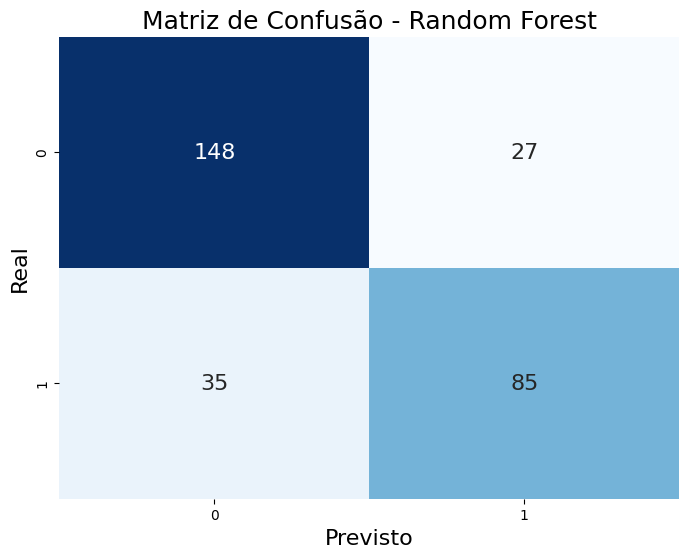

In [40]:
# Plotando as matrizes de confusão
plot_confusion_matrix(matriz_confusao_rf, 'Matriz de Confusão - Random Forest')

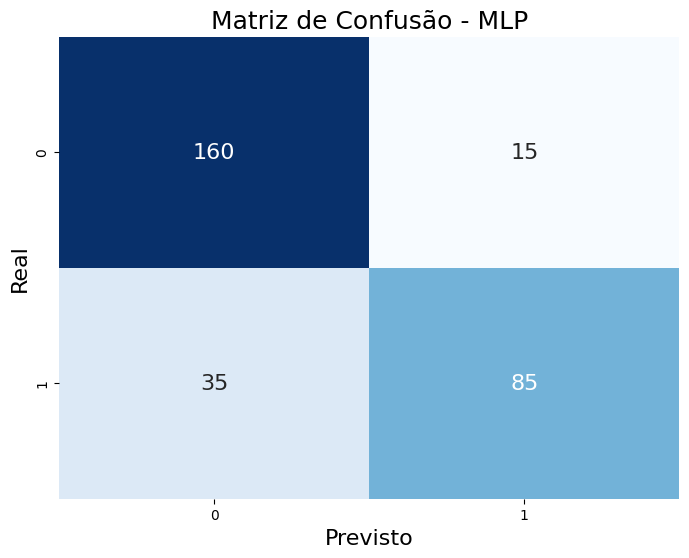

In [41]:
# Plotando as matrizes de confusão
plot_confusion_matrix(matriz_confusao_mlp, 'Matriz de Confusão - MLP')

## Fazendo a previsão para os dados de teste
- Vamos usar o modelo com melhor precisão para fazer o predict na base de teste
  - Nesse caso, o que se saiu melhor foi o MLP

In [42]:
# Visualizando a base de teste
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Sozinho,Familiares
6,1,1.869299,0,0,1.620136,0,1,1,0
718,3,0.000000,0,0,0.045293,2,1,1,0
685,2,-0.361471,1,2,1.174771,1,1,0,3


In [43]:
# Visualizando a base de teste
teste.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Sozinho,Familiares
0,892,3,0.331562,0,0,-0.280670,2,1,1,1
1,893,3,1.311954,1,0,-0.315800,0,0,0,1
2,894,2,2.488424,0,0,-0.201943,2,1,1,0


In [44]:
# Para a base de teste ser igual a base de treino, precisamos eliminar a coluna de id
X_teste = teste.drop('PassengerId',axis=1)

In [45]:
# Utilizando a regressão logística na base de teste
y_pred = clf_mlp.predict(X_teste)

In [46]:
# Criando uma nova coluna com a previsão na base de teste
teste['Survived'] = y_pred

In [47]:
# Selecionando apenas a coluna de Id e Survived para fazer o envio
base_envio = teste[['PassengerId','Survived']]

In [49]:
# Exportando para um csv
base_envio.to_csv('resultados_parte4.csv',index=False)

# Acurácia Final Obtida
- Abaixo está a acurácia final obtida de acordo com os tratamentos e modelos utilizados neste projeto. Caso queira ver o resultado obtido na primeira análise feita sobre esse dataset, clique no link a seguir: [**parte 1**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte1.ipynb), [**parte 2**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte2.ipynb) e [**parte 3**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/724a2795c1408eaa6b2ed6183460b228e7b9e849/analise_titanic_parte3.ipynb).

- Este projeto é a **Parte 4** de uma série contínua. Em cada parte, vamos tentar melhorar essa acurácia final, aplicando diferentes ações, modelos e tratamentos no dataset, com o objetivo de aumentar a precisão dos resultados finais.

- Observe que o melhor modelo dentre esses novos usados foi o **MLP**, pois obteve a maior acurácia dos dados de treinamento. Porém, a acurácia nos dados de teste não foi tão satisfatória quanto o esperado, como pode ser visto abaixo.

  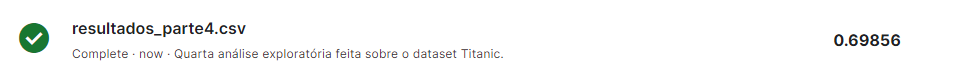



- Logo, o objetivo é entender o por que de tal ocorrência e como contornar esses resultados.